In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(1)

In [20]:
# plot size
plt.rcParams['figure.figsize'] = [10, 8]

In [21]:
grid_size = 3  # Kích thước lưới
rows = grid_size + 1 
cols = grid_size + 1
G = nx.DiGraph()

positions = {}  # Dictionary lưu trữ vị trí của các nodes

# Thêm source
G.add_node('source', demand=0, pos=(0, 0))
positions['source'] = (0, 0)

# Thêm các cạnh theo hướng từ trái sang phải và từ trên xuống dưới
for i in range(1, rows):
    for j in range(1, cols):
        # Thêm node vào đồ thị
        G.add_node((i, j), demand=0, pos=(i, j))
        positions[(i, j)] = (i, j)

        # Thêm cạnh đi xuống (dưới) nếu không phải là hàng cuối cùng
        if i < rows - 1:
            G.add_edge((i, j), (i + 1, j), weight=random.randint(1, 10), capacity=random.randint(7*grid_size, 10*grid_size))

        # Thêm cạnh đi qua phải nếu không phải là cột cuối cùng
        if j < cols - 1:
            G.add_edge((i, j), (i, j + 1), weight=random.randint(1, 10), capacity=random.randint(7*grid_size, 10*grid_size))

# Thêm sink
G.add_node('sink', demand=0, pos=(rows, cols))
positions['sink'] = (rows, cols)

# Thêm cạnh đi từ source đến hàng đầu tiên và từ hàng cuối cùng đến sink
for i in range(1, rows):
    G.add_edge('source', (i, 1), weight=0, capacity=9999)
    G.add_edge((i, cols - 1), 'sink', weight=0, capacity=9999)


In [22]:
# Thêm demand cho source và sink
G.nodes['source']['demand'] = -15 * grid_size
G.nodes['sink']['demand'] = 15 * grid_size

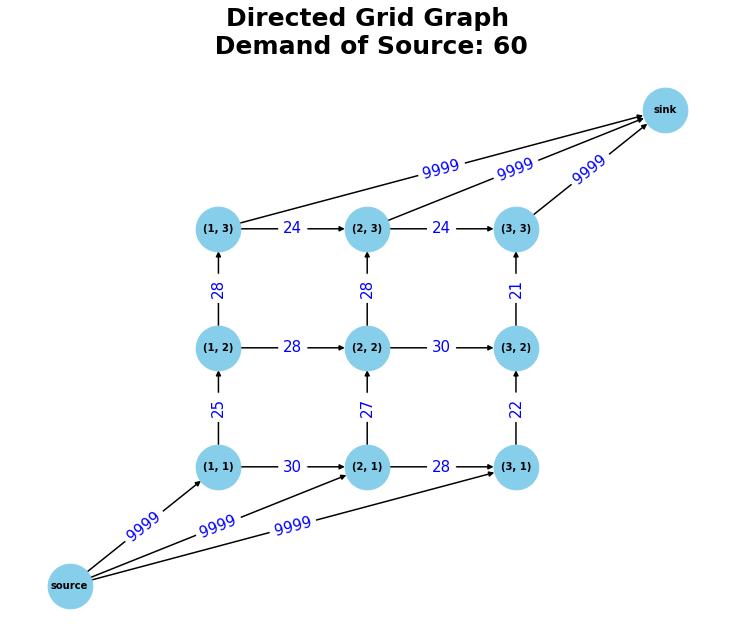

In [23]:
# Vẽ đồ thị
nx.draw(G, pos=positions, with_labels=True, node_size=2000, node_color='skyblue', font_weight='bold', font_color='black', font_size=10, width=1.5)
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels= nx.get_edge_attributes(G, 'weight'), font_size=15, font_color='red')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels= nx.get_edge_attributes(G, 'capacity'), font_size=15, font_color='blue')
plt.title('Directed Grid Graph\n Demand of Source: 60', fontweight='bold', fontsize=25)
plt.show()

In [24]:
# Tính toán luồng tối ưu
flow_cost, flow_dict = nx.capacity_scaling(G, demand='demand', capacity='capacity', weight='weight')
#flow_cost, flow_dict = nx.network_simplex(G, demand='demand', capacity='capacity', weight='weight')
#flow_cost = nx.min_cost_flow_cost(G, demand='demand', capacity='capacity', weight='weight')
#flow_dict = nx.min_cost_flow(G, demand='demand', capacity='capacity', weight='weight')

In [25]:
# Giá trị luồng tối ưu
print('Minimum cost:', flow_cost)

Minimum cost: 427


In [26]:
# Tạo một danh sách các cạnh và trọng số tương ứng
edges = []
weights = []

for start_node, neighbors in flow_dict.items():
    for end_node, weight in neighbors.items():
        edges.append((start_node, end_node))
        weights.append(weight)

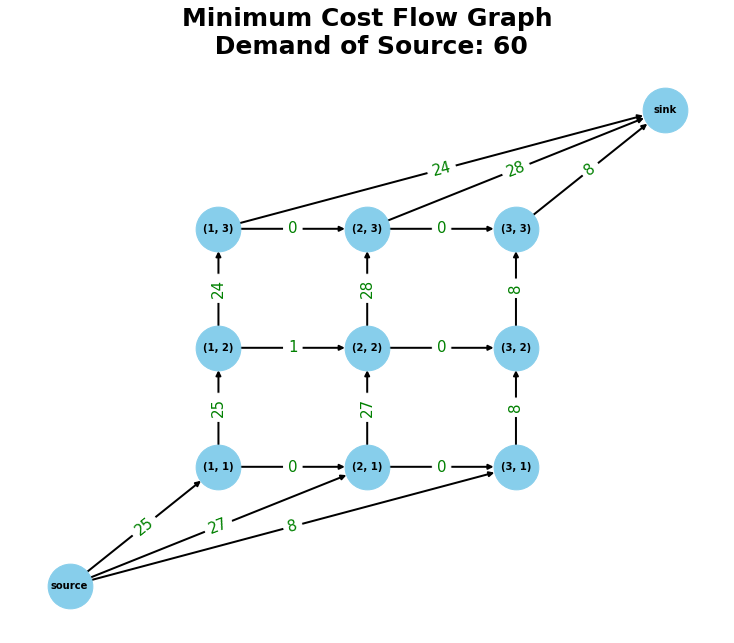

In [27]:
# Vẽ đồ thị luồng tối ưu
H = nx.DiGraph()
for i in range(len(edges)):
    H.add_edge(edges[i][0], edges[i][1], weight=weights[i])
nx.draw(H, pos=positions, with_labels=True, node_size=2000, node_color='skyblue', font_weight='bold', font_color='black', font_size=10, width=2)
nx.draw_networkx_edge_labels(H, pos=positions, edge_labels= nx.get_edge_attributes(H, 'weight'), font_size=15, font_color='green')
plt.title('Minimum Cost Flow Graph\n Demand of Source: 60', fontweight='bold', fontsize=25)
plt.show()
